In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
plt.rcParams['figure.figsize'] = (20, 15)

cryptocurrency='../data/raw/cryptocurrency/'
cryptocurrency_processed='../data/processed/cryptocurrency/'

If the two paths above do not work, please be sure the directories are created.

# Crypto data merging

First of all, we can see that we have a lot of currency datasets. The majority of this datasets have the same ending name 'price'. Lets see if we can merge them all in one csv in order to work in one go.

In [42]:
import glob
price_files = glob.glob(cryptocurrency+"*price.csv")
dfs = []
for price_file in price_files:
    df = pd.read_csv(price_file, index_col='Date')
    df['currency'] = currency_name = price_file.split('\\')[1].split('_price')[0]
    dfs.append(df)

In [43]:
for df in dfs:
    print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'currency'], dtyp

As we can see, all the csvs have the same columns and the rows can be selected using the currency column, so lets concat all the dataframes and export the dataframe into a csv.

In [52]:
df = pd.concat(dfs, ignore_index=False)
df.to_csv(cryptocurrency_processed+'prices.csv')

Now that prices are merged, lets see if we can merge the two files remaining, bitcoin_dataset and ethereum dataset.

In [54]:
dfbd = pd.read_csv(cryptocurrency+'bitcoin_dataset.csv', index_col='Date')
dfed = pd.read_csv(cryptocurrency+'ethereum_dataset.csv', index_col='Date(UTC)')

In [57]:
dfbd.columns

Index(['btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [58]:
dfed.columns

Index(['UnixTimeStamp', 'eth_etherprice', 'eth_tx', 'eth_address',
       'eth_supply', 'eth_marketcap', 'eth_hashrate', 'eth_difficulty',
       'eth_blocks', 'eth_uncles', 'eth_blocksize', 'eth_blocktime',
       'eth_gasprice', 'eth_gaslimit', 'eth_gasused', 'eth_ethersupply',
       'eth_chaindatasize', 'eth_ens_register'],
      dtype='object')

As we can see it's impossible to merge this two datasets toghether, then we will need to analyse them by separate

# Prices analysis

In order to start the analysis over the cryptocurrency dataset, we will start by the currency prices.

First of all we will reload the prices dataset

In [59]:
dfp = pd.read_csv(cryptocurrency_processed+'prices.csv', index_col='Date')

Lets visualize the price data

In [60]:
dfp.head()

,Open,High,Low,Close,Volume,Market Cap,currency
Date,,,,,,,
"Sep 05, 2017",514.90,550.95,458.78,541.71,"338,978,000","8,527,100,000",bitcoin_cash
"Sep 04, 2017",608.26,608.26,500.75,517.24,"328,957,000","10,072,200,000",bitcoin_cash
"Sep 03, 2017",578.27,617.41,563.59,607.43,"344,862,000","9,574,520,000",bitcoin_cash
"Sep 02, 2017",621.96,642.05,560.58,575.90,"350,478,000","10,297,000,000",bitcoin_cash
"Sep 01, 2017",588.40,645.52,586.73,622.17,"393,839,000","9,740,460,000",bitcoin_cash


In [61]:
dfp.describe()

,Open,High,Low,Close
count,10902.000000,10902.000000,10902.000000,10902.000000
mean,108.128991,111.604493,104.903597,108.582433
std,361.141176,373.066746,350.049136,363.397395
min,0.000086,0.000089,0.000079,0.000086
25%,0.188584,0.201342,0.178492,0.188905
50%,2.820000,2.940000,2.700000,2.825000
75%,15.155000,15.937500,14.325000,15.267500
max,4901.420000,4975.040000,4678.530000,4892.010000


In [62]:
dfp.index

Index(['Sep 05, 2017', 'Sep 04, 2017', 'Sep 03, 2017', 'Sep 02, 2017',
       'Sep 01, 2017', 'Aug 31, 2017', 'Aug 30, 2017', 'Aug 29, 2017',
       'Aug 28, 2017', 'Aug 27, 2017',
       ...
       'Jun 11, 2016', 'Jun 10, 2016', 'Jun 09, 2016', 'Jun 08, 2016',
       'Jun 07, 2016', 'Jun 06, 2016', 'Jun 05, 2016', 'Jun 04, 2016',
       'Jun 03, 2016', 'Jun 02, 2016'],
      dtype='object', name='Date', length=10902)

We can see that the index data is not in the date format, we will assign the correct type.

In [63]:
dfp.index = pd.to_datetime(dfp.index)

In [64]:
dfp.sort_index(ascending=True, inplace=True)

In [65]:
dfp.head()

,Open,High,Low,Close,Volume,Market Cap,currency
Date,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,1500520000,bitcoin
2013-04-28,4.30,4.40,4.18,4.35,-,73773400,litecoin
2013-04-29,4.37,4.57,4.23,4.38,-,74952700,litecoin
2013-04-29,134.44,147.49,134.00,144.54,-,1491160000,bitcoin
2013-04-30,4.40,4.57,4.17,4.30,-,75726800,litecoin


Here we can see that volume has values that are not numeric, let's see if this happen in all the columns

In [68]:
df = dfp[dfp.applymap(np.isreal)]

In [69]:
len(df) - df.count()

Open              0
High              0
Low               0
Close             0
Volume        10902
Market Cap    10902
currency      10902
dtype: int64

We can see that not only the volume had non numeric values, but also the market cap column (currency column are strings, so it's obvious).

Now let's see if there are exagerated values that may be outliers in our data

In [70]:
dfp.describe()

,Open,High,Low,Close
count,10902.000000,10902.000000,10902.000000,10902.000000
mean,108.128991,111.604493,104.903597,108.582433
std,361.141176,373.066746,350.049136,363.397395
min,0.000086,0.000089,0.000079,0.000086
25%,0.188584,0.201342,0.178492,0.188905
50%,2.820000,2.940000,2.700000,2.825000
75%,15.155000,15.937500,14.325000,15.267500
max,4901.420000,4975.040000,4678.530000,4892.010000


We see that the percentiles in our data say that our values on the 75% have value of more or less 15, but we can see that the max value is around 5000, lets see if that has sense

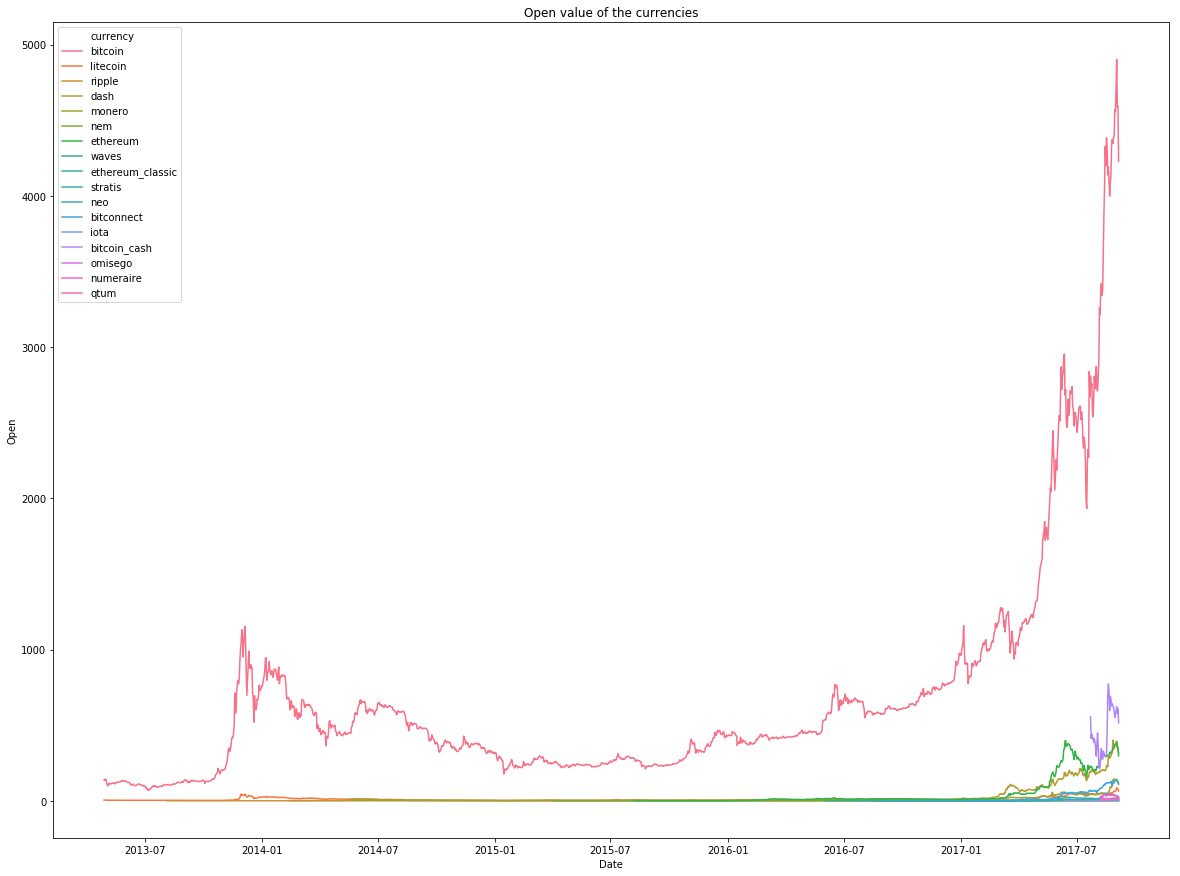

In [87]:
sns.lineplot(x=dfp.index, y='Open', hue='currency', data=dfp)
plt.title('Open value of the currencies');

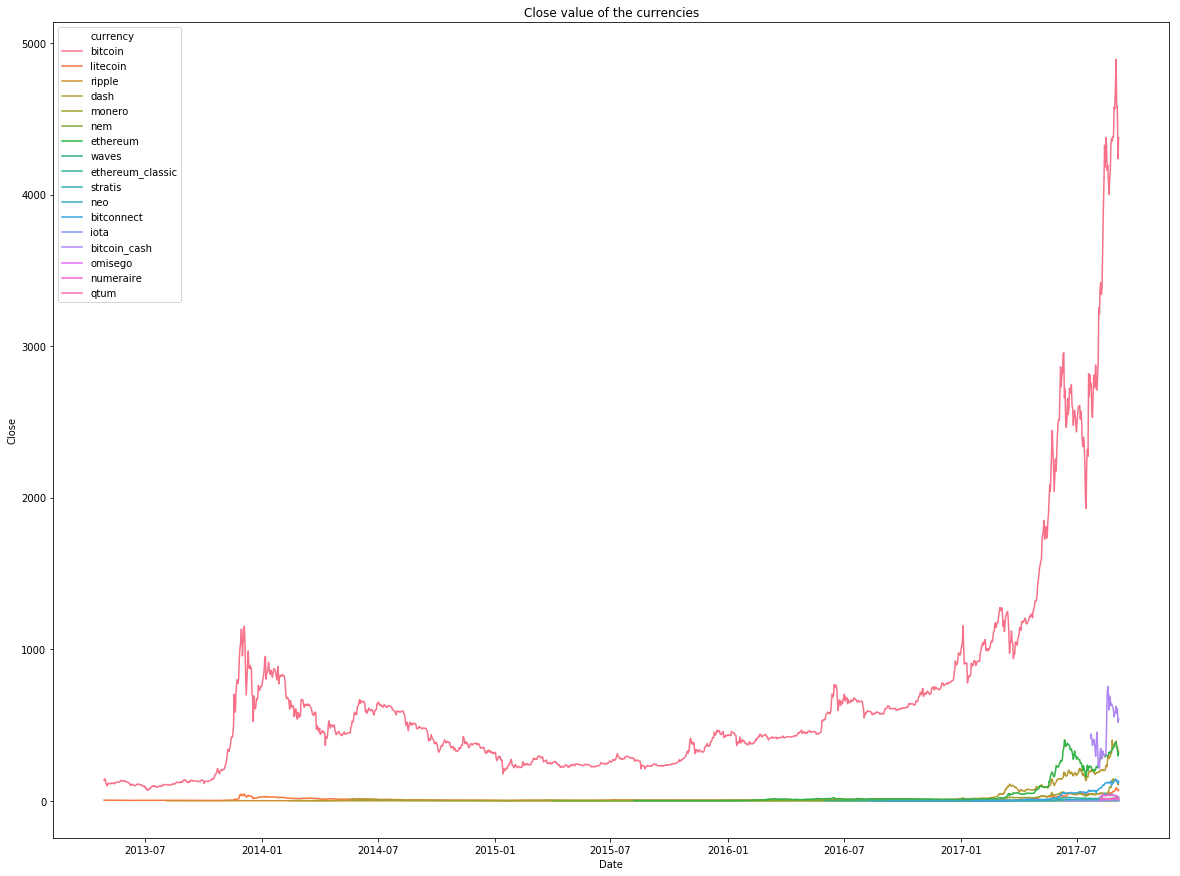

In [88]:
sns.lineplot(x=dfp.index, y='Close', hue='currency', data=dfp)
plt.title('Close value of the currencies');

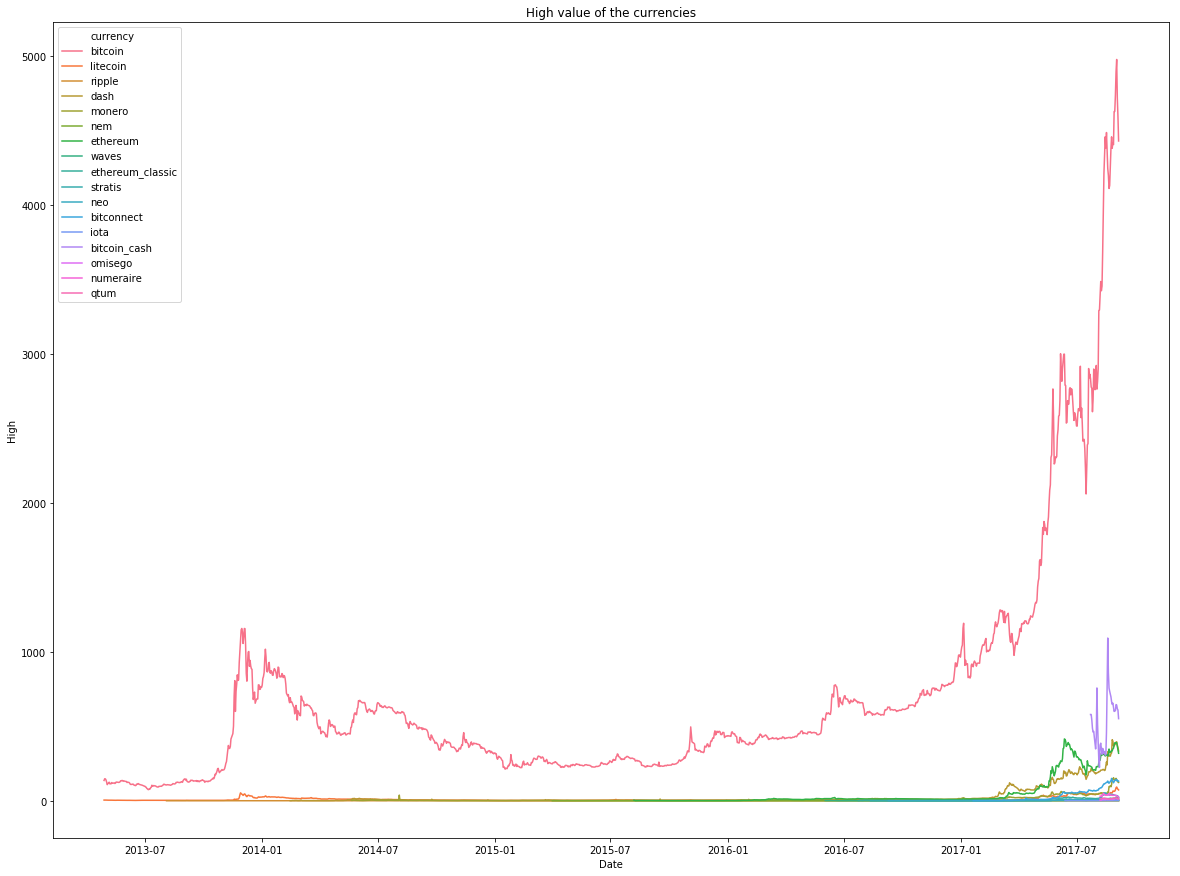

In [89]:
sns.lineplot(x=dfp.index, y='High', hue='currency', data=dfp)
plt.title('High value of the currencies');

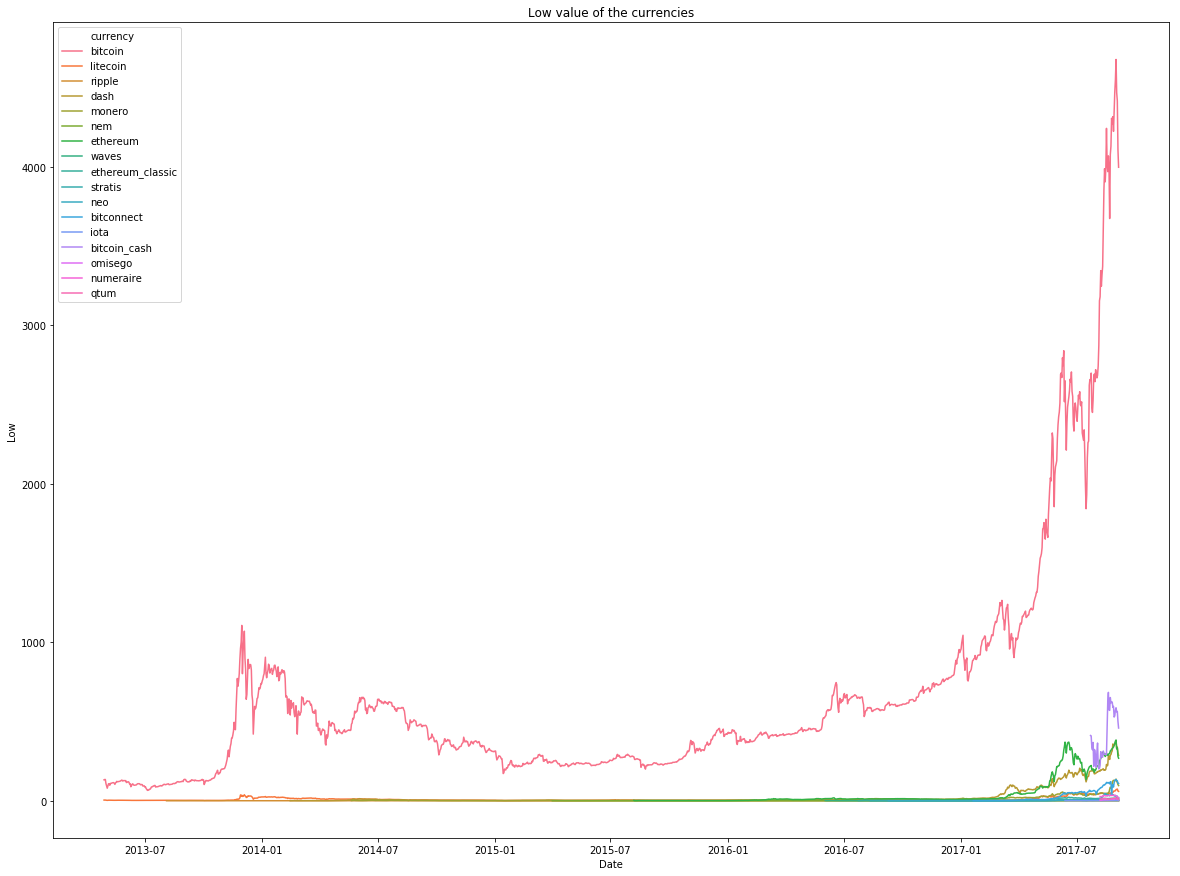

In [90]:
sns.lineplot(x=dfp.index, y='Low', hue='currency', data=dfp)
plt.title('Low value of the currencies');

As we can see, those values made sense in general terms, just because they indicate that the trend of the currency prices was really high. We can correlate that high value with the cryptocurrency BOOM at 2017 (The most identifiable is the bitcoin currency).